In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the CSV file
df=pd.read_csv("C:\\Users\\PC\\Desktop\\Çalışmalarım\\DiabetesData\\diabetes.csv")

In [3]:
#Performing exploratory data analysis
def EAD(data):
    df1=data
    print("***************************SHAPE****************************")
    print(df.shape)
    print("***************************TYPE****************************")
    print(df.dtypes)
    print("***************************FIRST-5-ROW****************************")
    print(df.head())
    print("***************************LAST-5-ROW*****************************")
    print(df.tail())
    print("***************************DESCRIBE*******************************")
    print(df.describe())
    print("***************************INFO***********************************")
    print(df.info())
    print("***************************NUMBER-OF-NULL****************************")
    print(df.isna().sum().sum())
    print("***************************QUANTILE****************************")
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
EAD(df)

***************************SHAPE****************************
(768, 9)
***************************TYPE****************************
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
***************************FIRST-5-ROW****************************
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age

In [5]:
#Identifying and handling missing values
df.loc[:, df.columns.difference(['Outcome', 'Pregnancies'])] = df.loc[:, df.columns.difference(['Outcome', 'Pregnancies'])].replace(0, np.nan)

In [6]:
grouped = df.groupby('Outcome')

imputed_dfs = []
for name, group in grouped:
    imputer = KNNImputer(n_neighbors=4)
    imputed_group = imputer.fit_transform(group)
    imputed_group_df = pd.DataFrame(imputed_group, columns=group.columns)
    imputed_dfs.append(imputed_group_df)

df_imputed = pd.concat(imputed_dfs).reset_index(drop=True)

print(df_imputed)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1.0     85.0           66.0          29.00    61.00  26.6   
1            1.0     89.0           66.0          23.00    94.00  28.1   
2            5.0    116.0           74.0          20.75   106.75  25.6   
3           10.0    115.0           79.5          31.75   128.50  35.3   
4            4.0    110.0           92.0          28.00   128.25  37.6   
..           ...      ...            ...            ...      ...   ...   
763          1.0    128.0           88.0          39.00   110.00  36.5   
764          0.0    123.0           72.0          30.00   263.50  36.3   
765          6.0    190.0           92.0          24.75   232.00  35.5   
766          9.0    170.0           74.0          31.00   237.00  44.0   
767          1.0    126.0           60.0          33.00   131.75  30.1   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.351  31.0      0.0  
1                

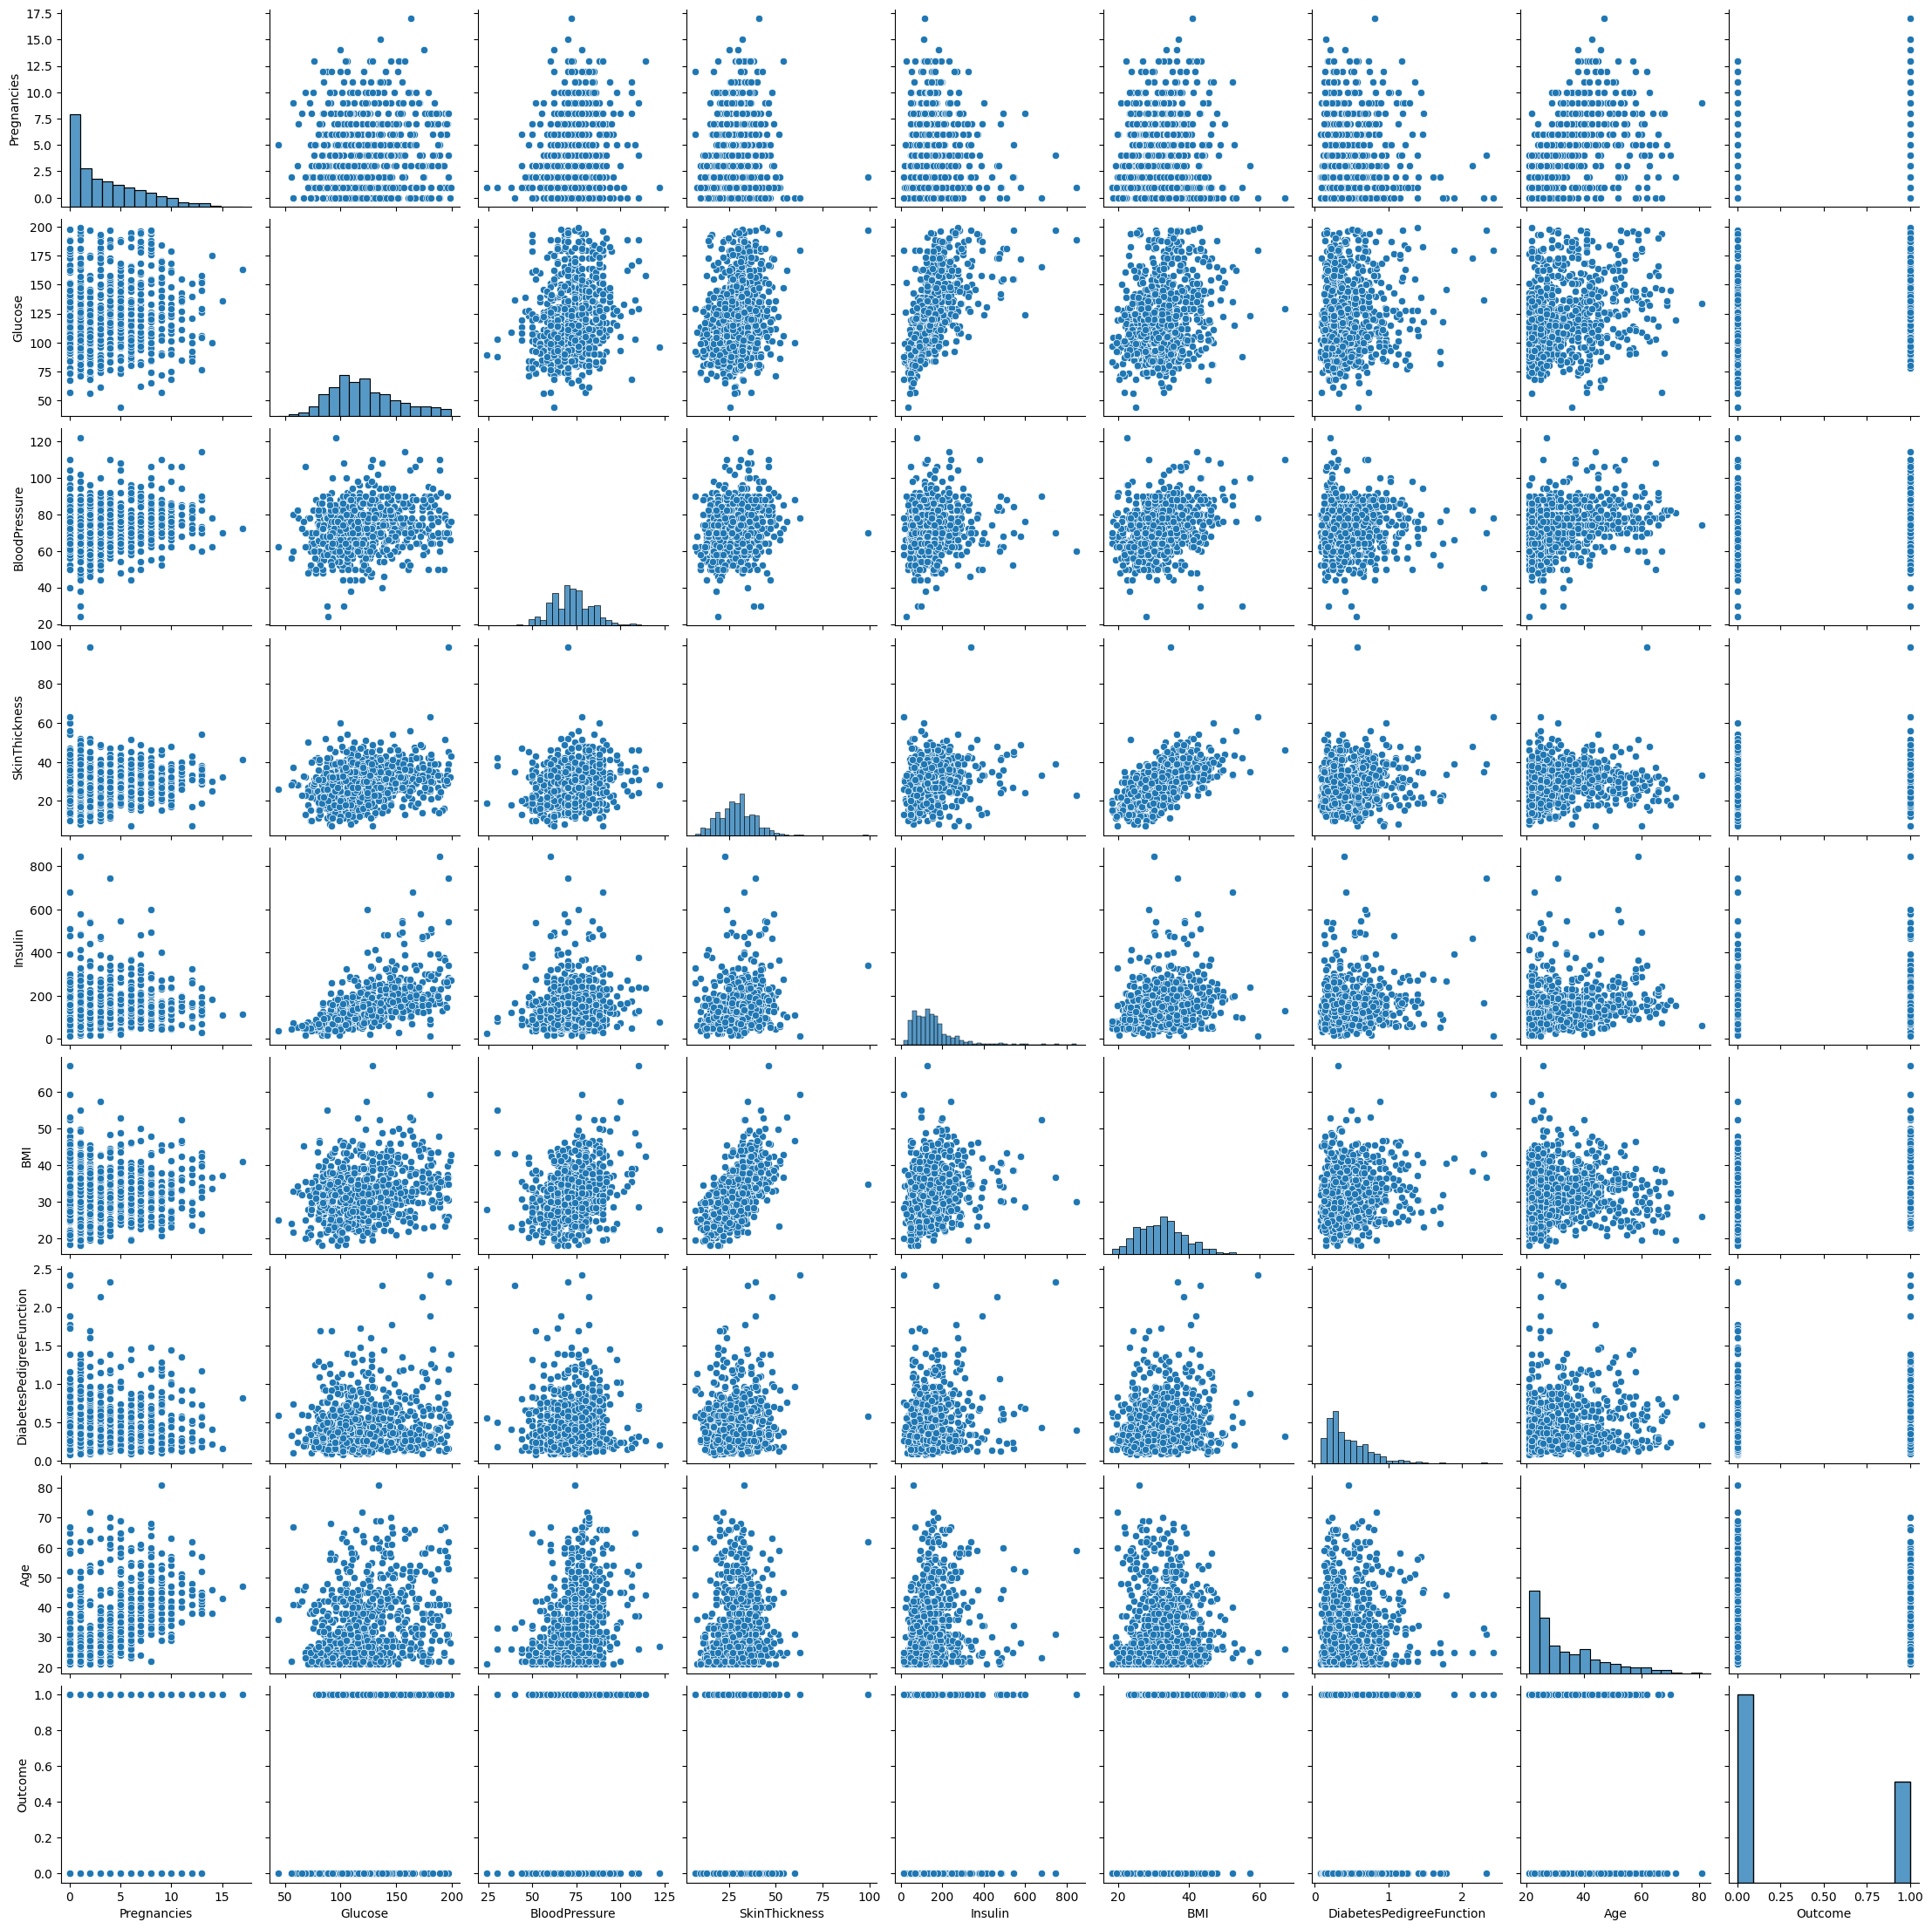

In [7]:
sns.pairplot(df_imputed)

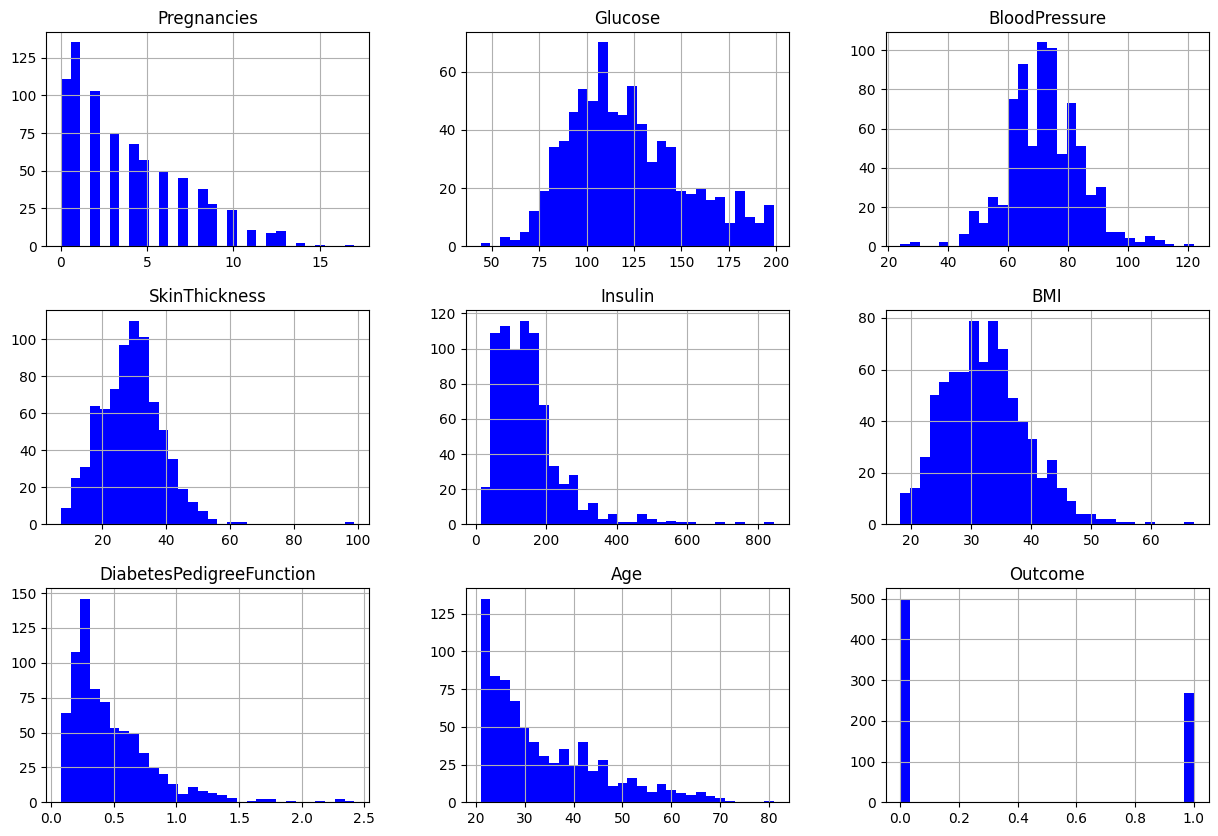

In [8]:
df_imputed.hist(bins=30, figsize=(15,10), color='blue')
plt.show()

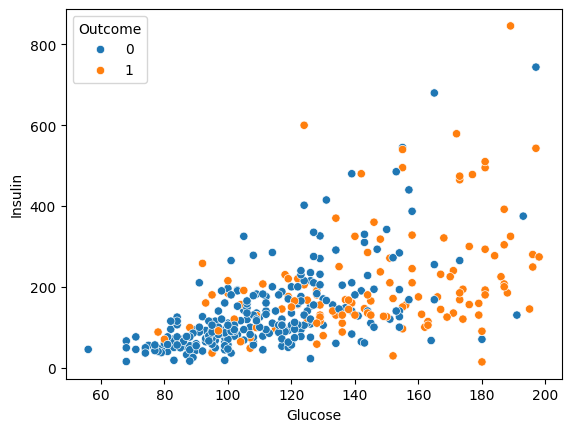

In [9]:
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.show()

In [10]:
columns = [col for col in df_imputed.columns]

In [11]:
corr = df_imputed[columns].corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.131985       0.217097       0.100657   
Glucose                      0.131985  1.000000       0.229607       0.244709   
BloodPressure                0.217097  0.229607       1.000000       0.220705   
SkinThickness                0.100657  0.244709       0.220705       1.000000   
Insulin                      0.059894  0.617147       0.123447       0.248708   
BMI                          0.026098  0.239248       0.291624       0.633057   
DiabetesPedigreeFunction    -0.033523  0.139322       0.007549       0.109424   
Age                          0.544341  0.270767       0.339398       0.148719   
Outcome                      0.221898  0.497041       0.163588       0.294213   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.059894  0.026098                 -0.033523   
Glucose                   0.617147  0.239

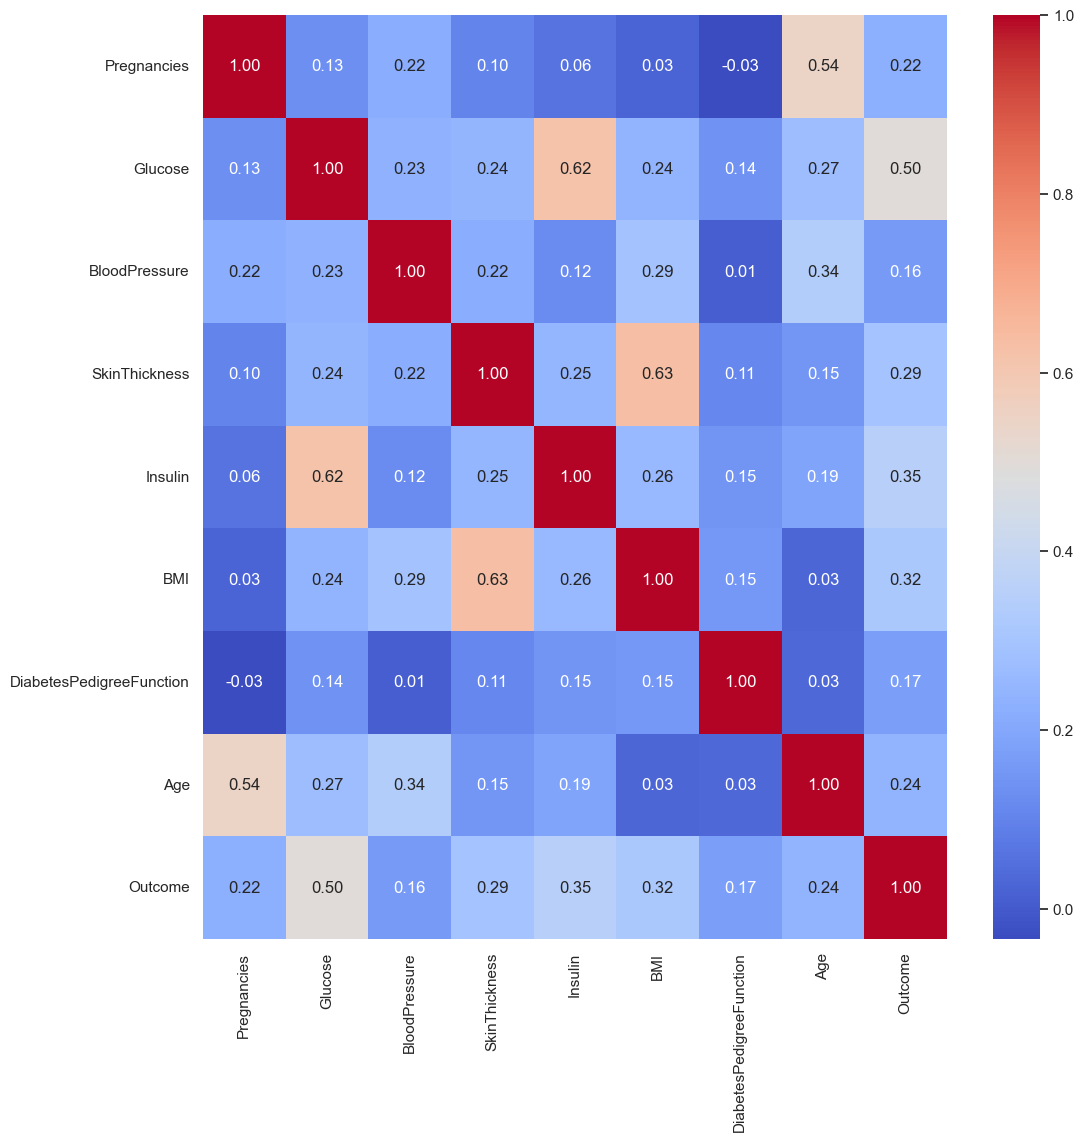

In [12]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
141          4.0    197.0           70.0           39.0    744.0  36.7   
151          0.0    165.0           90.0           33.0    680.0  52.3   
502          0.0    137.0           40.0           35.0    168.0  43.1   
507          1.0    189.0           60.0           23.0    846.0  30.1   
642          3.0    173.0           82.0           48.0    465.0  38.4   
657          1.0    172.0           68.0           49.0    579.0  42.4   
670          0.0    180.0           78.0           63.0     14.0  59.4   
699          2.0    197.0           70.0           99.0    339.0  34.7   
701          8.0    124.0           76.0           24.0    600.0  28.7   

     DiabetesPedigreeFunction   Age  Outcome  
141                     2.329  31.0      0.0  
151                     0.427  23.0      0.0  
502                     2.288  33.0      1.0  
507                     0.398  59.0      1.0  
642                     

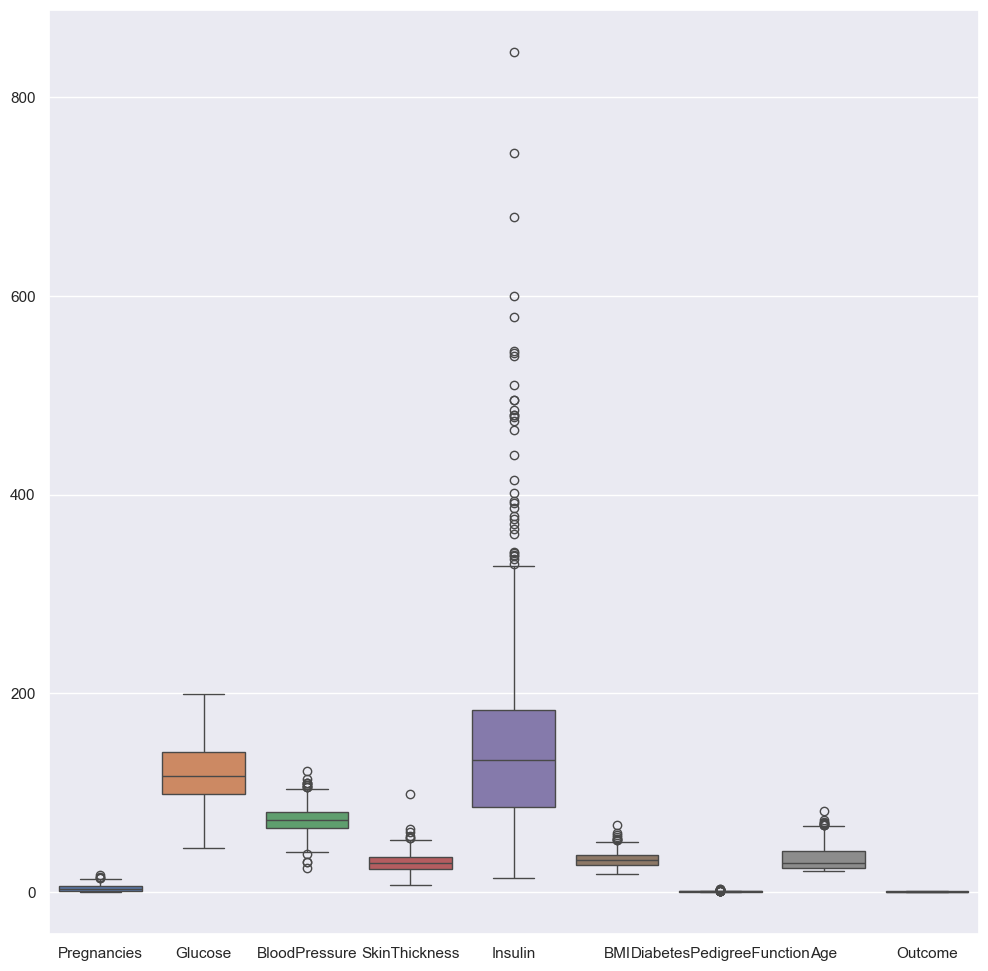

In [13]:
#Detecting and removing outliers from dataset
Q1 = df_imputed.quantile(0.10)
Q3 = df_imputed.quantile(0.90)
IQR = Q3 - Q1
outliers = df_imputed[((df_imputed < (Q1 - 1.5 * IQR)) | (df_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)
sns.boxplot(data=df_imputed)
plt.show()


In [14]:
#Outlier data
is_outlier = (df_imputed < (Q1 - 1.5 * IQR)) | (df_imputed > (Q3 + 1.5 * IQR))

outlier_rows = is_outlier.any(axis=1)

# Deleting outliers
clean_data = df_imputed[~outlier_rows]

# Clean data
print("Clean data:")
print(clean_data)

Clean data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1.0     85.0           66.0          29.00    61.00  26.6   
1            1.0     89.0           66.0          23.00    94.00  28.1   
2            5.0    116.0           74.0          20.75   106.75  25.6   
3           10.0    115.0           79.5          31.75   128.50  35.3   
4            4.0    110.0           92.0          28.00   128.25  37.6   
..           ...      ...            ...            ...      ...   ...   
763          1.0    128.0           88.0          39.00   110.00  36.5   
764          0.0    123.0           72.0          30.00   263.50  36.3   
765          6.0    190.0           92.0          24.75   232.00  35.5   
766          9.0    170.0           74.0          31.00   237.00  44.0   
767          1.0    126.0           60.0          33.00   131.75  30.1   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.351  31.0      0.0  
1    

In [15]:
#Splitting the processed dataset into train and test set
X = clean_data.drop('Outcome', axis=1)  
y = clean_data['Outcome'] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
#Performing normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Defining and training the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
}

In [19]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.7566
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       101
         1.0       0.66      0.57      0.61        51

    accuracy                           0.76       152
   macro avg       0.73      0.71      0.72       152
weighted avg       0.75      0.76      0.75       152



Model: Random Forest
Accuracy: 0.8355
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       101
         1.0       0.76      0.75      0.75        51

    accuracy                           0.84       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.83      0.84      0.84       152



Model: Support Vector Machine
Accuracy: 0.7829
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       101
         1.0       0.70      0.63  

In [20]:
#Defining and specifying the parameter grid
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    },
    'XGBoost' : {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]
    },

    'LightGBM' : {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Gradient Boosting': {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9]
    },
    'Naive Bayes': {
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1.0]
    },
}

In [21]:
#Optimizing the model and printing the result
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    model_param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(estimator=model, param_grid=model_param_grid, cv=5,n_jobs=-1, scoring='recall_macro')
    grid_search.fit(X_train_scaled, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    results[model_name] = {
        'Accuracy(Test)': accuracy_score(y_test, y_pred),
        'Recall(Test)': recall_score(y_test, y_pred, average='macro'),
        'F1 Score(Test)': f1_score(y_test, y_pred, average='macro'),
    }

for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in result.items():
        print(f"{metric}: {value}")

Training Logistic Regression...
Training Random Forest...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 210, number of negative: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 607, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345964 -> initscore=-0.636829
[LightGBM] [Info] Start training from score -0.636829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [22]:
#Identifying the model with the highest recall score and printing the score
best_recall_model = max(results.items(), key=lambda x: x[1]['Recall(Test)'])
best_model_name, best_model_results = best_recall_model

print(f"Model with the highest recall score: {best_model_name}")
for metric, value in best_model_results.items():
    print(f"{metric}: {value}")

Model with the highest recall score: Gradient Boosting
Accuracy(Test): 0.8486842105263158
Recall(Test): 0.8327509221510386
F1 Score(Test): 0.831135584214848


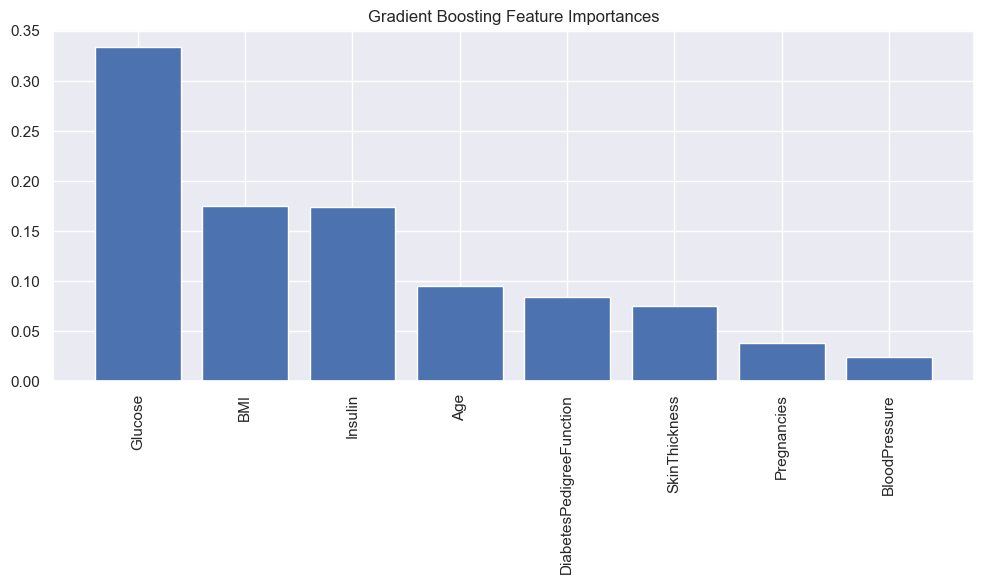

In [23]:
# Feature importances
importances = models['Gradient Boosting'].feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Visulation
plt.figure(figsize=(10,6))
plt.title("Gradient Boosting Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()